**Daniel Goings<br>
dcgoings@buffalo.edu<br>
MTH337 Project 7 - Data Analysis, Visualization, and Machine Learning**

# Introduction

Throughout this project, we will explore data analysis, visualization, and machine learning with regards to a specific data set of the Iris flowers and its various species.

The first half of our project will revolve around the exploration of the Iris flower data set and how we can manipulate the data for further and more in-depth analysis. We will use several new Python libraries such as seaborn and it's graphing capabilities to display the different categories of the recorded data in various ways. Additionally, in case these categories are not immediately clear to us, additional objectives include identifying and defining these categories for a better understanding of the Iris flower, such as sepals and petals. Finally, after analyzing this data, we will record our discoveries and see if we can identify patterns or trends in the data that may help with identification of Iris species.

In the second half of our project, we will investigate Support Vector Machines, or SVMs, and how it can help us provide further fidelity to our data. We will manipulate our data even more so that it can be utilized by the SVM for training and testing predictive purposes. After completion, we will provide our analysis of the predictive data and see how it compares with our earlier analysis.

# PART 1: Analyzing a data set

### PROBLEM 1: Import the various libraries you need into Jupyter notebook. You will need NumPy, Matplotlib, Pandas, and Seaborn at the very least. You can import any other libraries you need.

In [327]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.display import Image

### PROBLEM 2: From the Seaborn module, import the Iris flower data set as irisData = sns.load_dataset('iris'). This command will load the Iris flower data set into the data-frame irisData

In [14]:
irisData = sns.load_dataset('iris')

### PROBLEM 3: Introduce the data-set. What features does it contain? By features I mean the different categories of recorded data. For instance, sepal length is a feature of the data-set and will show up as a column name. What do these features mean? You don’t have to go over-board, but some of this information is easily available by just doing a Google search. As always, cite your sources and no copy-pasting.

In [15]:
irisData.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
irisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


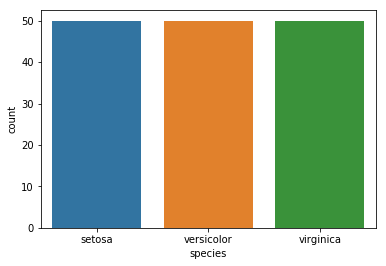

In [12]:
sns.countplot(x='species', data=irisData)

We first introduce the Iris data-set through the .head() and .info() functions, which reveal five columns of data including sepal length, sepal width, petal length, petal width, and species. After noticing the species column, I wanted to first check if we were working with data for one or multiple species of the flower. I had a feeling I already knew the answer to this, but wanted to confirm anyways. To do this, I decided to create a simple countplot of the data, which revealed that the data-set includes three different species of Iris with fifty entries of each species: Setosa, Versicolor and Virginica.

Additionally, I noticed through irisData.info() that all categories of the recorded data for all 150 entries are non-null, which means we should expect a complete set of data with no blank, null, or unrecorded entries for any categories.

So let's take a look back at the categories included in our data-set. In order to understand the data, we need to understand what the columns represent, such as what petals and sepals are. 

In [31]:
# image source [1,2]
Image(url = "https://upload.wikimedia.org/wikipedia/commons/7/7f/Mature_flower_diagram.svg", width=750)

Depicted above and noted in our sources, we learn that sepals are part of the flower, typically green but not always, and branching from the top of the stem that serve as protection for the flower during the budding process and serve as support once the flower is in bloom [1] Additionally, the petal is what most people commonly see when looking at a flower, as it is typically the brightly-colored part of a flower that surrounds the insides and reproductive parts of the flower [2].

Further research on petals and sepals reveals what these columns are actually referring to, specifically in relation to Irises. The below picture shows the three species of Iris that our data includes and how they look compared to eachother. We can get a better idea of what this data-set is talking about and what we should expect later on during our in-depth analysis.

In [33]:
Image(url="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png", width=750)

### PROBLEM 4: Perform some explorations on the data set. Get some statistics of each of the variables. Explore relationships between the different features of the data-set. Remember, each of the flower samples is one row. The various properties of the flowers are the features of this data-set and are stored in the columns. Making a pair-plot (in addition to other analyses) should help a lot.

In [55]:
irisData.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


First, I use the above data to get a shallow look at the data as a whole without any regard to the species. A quick search for this data-set online revealed that all measurements are in centimeters, so we will keep that in mind through the remainder of the project [3].

For the sepal portion of the data, the average length is 5.84cm while the average width is 3.06cm. The minimum and maximum lengths for the sepals are 4.3cm and 7.9cm respectively, giving us a range between the two of 3.6cm. As for widths, the minimum and maximum are 2.0cm and 4.4cm, giving us a range between the two of 2.4cm.

For the petal portion of the data, the average length is 3.76cm while the average width is 1.2cm. The minimum and maximum lengths are 1.0cm and 6.9cm respectively, giving us a range between the two of 5.9cm. As for widths, the minimum and maximum are 0.1cm and 2.5cm, giving us a range between the two of 2.4cm.

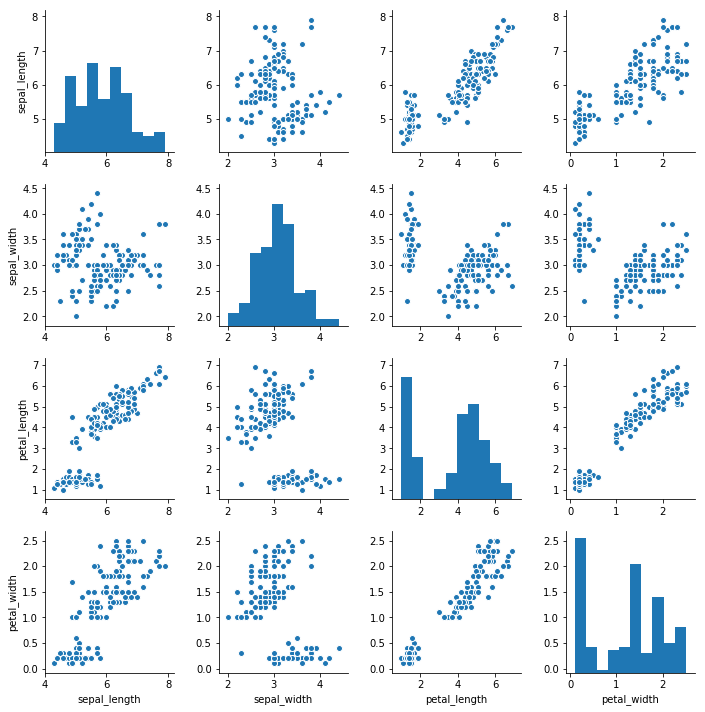

In [58]:
sns.pairplot(irisData)

Once again, looking at the data as a whole, we can identify *some* trends early on which may change as we identify the species. It appears that there are no/minimal trends/patterns associated with sepal width and sepal length; however, sepal width/length and petal length/width (to clarify: one from each) both appear to be split up in two major clusters in all eight possible graphs. Additionally, we do see a significant linear trend between petal length and petal width, also with two distinct clusters.

### PROBLEM 5: In this dataset, we would like to classify, based on the features, which of the flowers belongs to which of the species. However, rushing in blindly to do calculations is never a good thing. We would like to understand first what to expect. Which of the species are easier to classify? Why? Your conclusions and statements must be supported by well-chosen plots and numbers. Remember, this data is collected for a large population, so you can do statistics on the data too. Check for scatter, distributions etc. Remember, you can separate the data in Pandas if you want to look at each species separately

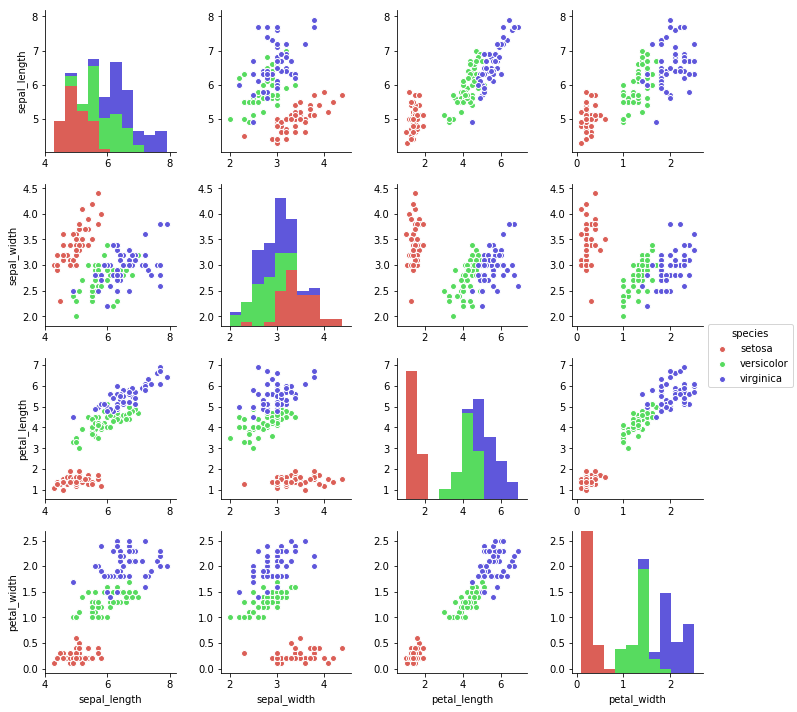

In [59]:
sns.pairplot(irisData, hue='species', palette='hls')

Now that we take a second look at the pairplot with the species identified, we have significantly more information to work with. From the above data, we notice that the Iris setosa species is very distinguishable and separate from the other two species in all aspects and have minimal to no overlap with Iris versicolor and Iris virginica. While there is overlap in almost all of the graphs between Iris versicolor and Iris virginica, we can see that, *typically*,  in (petal width x petal length) the versicolor's petals are usually shorter in width, with some overlap in length. It's possible that this would be a key factor in differentiating the two species.

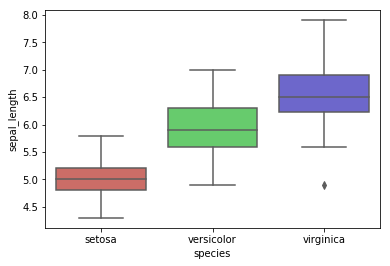

In [69]:
sns.boxplot(data = irisData, x = "species", y = "sepal_length", palette='hls')

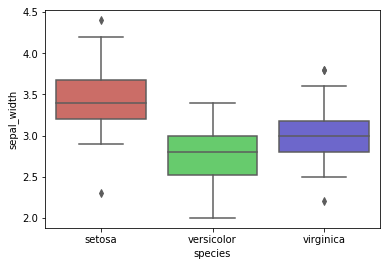

In [74]:
sns.boxplot(data = irisData, x = "species", y = "sepal_width", palette='hls')

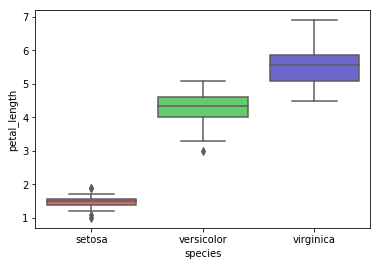

In [71]:
sns.boxplot(data = irisData, x = "species", y = "petal_length", palette='hls')

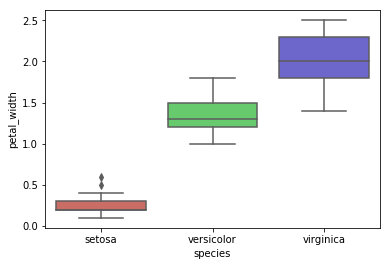

In [72]:
sns.boxplot(data = irisData, x = "species", y = "petal_width", palette='hls')

As previously noted in our analysis following the pairplot, we can see once again that the Iris setosa is in a league of it's own with it's smaller petals, both in length and width. Even accounting for outliers in the data, the measurements of the Iris setosa's petals don't come close to the size of the Iris versicolor, which is the next largest, followed by Iris virginica.

Furthermore, our earlier analysis for the Iris versicolor and Iris virginica appears to be spot on. While there is a decent overlap between the two for the size of their sepals, our best bet for identification purposes between the two would be using their petal lengths and width. While there is some overlap in the minimum to lower quartile and upper quartile to maximum values, the 25% to 75% appears to have significant separation between the two. We can conclude that, while not exact, petal lengths and width would be best used to identify the species of Iris, with Iris setosas having the smallest, followed by Iris versicolors, then Iris virginicas.

# PART 2: Using machine learning to classify the flower samples into different species

### PROBLEM 1: Introduce the SVM. You don’t need to do the math if you can’t. I am looking for a intuitive understanding of what it is. Read up on SVMs and understand their strengths and weaknesses. Why would it be a good choice here?

SVM, also known as Support Vector Machines, are "supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis" [4]. In other words, and to my understanding, the idea behind SVMs is that given data with a large enough sample-set, we should be able to assign new entries based on the previous data given and the trends and patterns analyzed in that given data set. The overall idea is that we utilize machine learning techniques that allow us to make predictions of classifications, based on those previously mentioned trends and patterns, for any new data given!

A strength to using SVM's is that, simply, they're predictive. Being able to utilize the data we already have on hand in order to predict or identify future trends or patterns is what makes this so appealing in the computational world. The drawback to this, however, is that the data *must* be random and even then, it's possible that a given data set could be unintentionally bias and may not actually be beneficially to use. For example, making or having a data set that is "too focused" on one particular area, or has too much data for one variable but not enough data for the others could drastically change the predictive aspects we desire.

### PROBLEM 2: First, you will need to clean up our data and pre-process it. Split up the data set into a training set and a testing set. One will be used for training and the other will be used for testing after the SVM has been trained. You also need to split the data into the features and the prediction labels. Use test train split from the sklearn.model selection module to do this. Refer to the class notes for more detail. You can do a 70-30 split or 80-20 split. For the Iris data-set clean up minimal since all the columns are numerical and the data-set does not have missing values.

In [195]:
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

irisModel = SVC()

In [196]:
x = irisData.drop(['species'], axis=1)
y = irisData['species']

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

### PROBLEM 3: Once you have split up the data, import the SVM model (SVC in sklearn) and train it with your training data.

In [175]:
irisModel.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### PROBLEM 4: Now, it is finally time to test your model. Get your predictions from the model using the .predict() method along with your test. Then, print the confusion matrix and the classification report as we did in class. Both of these are available in sklearn.metrics as classification report and confusion matrix. Once you get your predictions, explain them using the two measures. Explain what precision and recall is and how they pertain to our model. You can use other measures to discuss your results.

In [307]:
predictions = irisModel.predict(x_test)

In [308]:
print(confusion_matrix(y_test, predictions))

[[16  0  0]
 [ 0 10  0]
 [ 0  0 19]]


In [309]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      1.00      1.00        10
  virginica       1.00      1.00      1.00        19

avg / total       1.00      1.00      1.00        45



And a second set of predictions for comparison.

In [301]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)
irisModel.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [302]:
predictions2 = irisModel.predict(x_test)

In [303]:
print(confusion_matrix(y_test, predictions2))

[[16  0  0]
 [ 0  9  1]
 [ 0  3 16]]


In [304]:
print(classification_report(y_test, predictions2))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       0.75      0.90      0.82        10
  virginica       0.94      0.84      0.89        19

avg / total       0.92      0.91      0.91        45



First, in order to understand the data above, we must acknowledge what 'precision' and 'recall' actually mean to us. In the confusion matrix, the diagnol positions in the matrix (0,0), (1,1), and (2,2), represent the actual number of Iris setosa, versicolor, and virginicas predicted. The positions to the left and right of the diagnals represent the outliers, or cases in which the species was incorrectly identified.

Using the same data, we can show the confusion matrix in a different manner: the classification report. The classification report gives us the data in percentages. Precision is defined as the number of total true positives divided by the number of total true positives plus the number of total false positives.

$$ precision = \frac{total\,true\,positives}{total\,true\,positives\,+\,total\,false\,positives}$$

Additionally, recall would be the same thing, except the denominator includes the number of total false *negatives* instead of positives.

$$ precision = \frac{total\,true\,positives}{total\,true\,positives\,+\,total\,false\,negatives}$$

I utilized two sets of predictions to show that the data is randomized each time with varying results. In the first data-set we actually have 100% accuracy. 16 Iris setosas, 10 Iris versicolors, and 19 Iris virginica were correctly identified in the first predictive set. However, in our second data-set, we have 92% accuracy in identification: 100% for setosa, 75% for versicolor, and 94% for virginica. The mixup, to no surprise, was 3 Iris virginicas being misidentified as Iris versicolors, and 1 versicolor being misidentified as a virginica. 

After running the prediction set many, many times (not shown), I did notice something in particular: not once was a Iris setosa misidenfitied as a false positive or false negative. This made me reflect on what I mentioned earlier, how the Iris setosa was in a league of its own when it came to its petal widths and lengths and had zero overlap with the other species. This led me to believe that the SVM and the prediction sets were also able to come to this conclusion, and as a result, had 100% accuracy with the given data for identifying Iris setosas.

For a little bit of fun, I decided to test this theory out. The below function setosa() will just run the irisModel and re-populate the random data for x iterations. You can change 'stop' to whatever you'd like, but for now I set it to 100. If the predictions find a false negative or false positive for Iris setosa, then it will return a positive integer at the end of the function; however, in multiple runs of 100 and 1000 iterations, this is never the case.

In [325]:
def setosa():
    count = 0
    stop = 100
    setosaIncorrect = 0
    
    while count < stop:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)
        irisModel.fit(x_train, y_train)
        predictions3 = irisModel.predict(x_test)
        temp = confusion_matrix(y_test, predictions3)
        print("Number of Iris setosa's identified: %s" % temp[0][0])
        if temp[0][1] or temp[0][2] or temp[1][0] or temp[2][0] > 0:
            print(temp[0][1] + ", " + temp[0][2])
            setosaIncorrect +=1
        count+=1
    print("Number of false positive/negatives for Iris setosa: %s" % setosaIncorrect)

In [326]:
setosa()

Number of Iris setosa's identified: 16
Number of Iris setosa's identified: 20
Number of Iris setosa's identified: 14
Number of Iris setosa's identified: 13
Number of Iris setosa's identified: 16
Number of Iris setosa's identified: 17
Number of Iris setosa's identified: 20
Number of Iris setosa's identified: 13
Number of Iris setosa's identified: 12
Number of Iris setosa's identified: 19
Number of Iris setosa's identified: 18
Number of Iris setosa's identified: 17
Number of Iris setosa's identified: 16
Number of Iris setosa's identified: 20
Number of Iris setosa's identified: 18
Number of Iris setosa's identified: 15
Number of Iris setosa's identified: 13
Number of Iris setosa's identified: 17
Number of Iris setosa's identified: 18
Number of Iris setosa's identified: 13
Number of Iris setosa's identified: 22
Number of Iris setosa's identified: 10
Number of Iris setosa's identified: 18
Number of Iris setosa's identified: 15
Number of Iris setosa's identified: 18
Number of Iris setosa's i

# CONCLUSION

Throughout this project, we successfully explored the Iris flower data set through analysis, visualization and machine learning.

We analyzed and extracted data from the given data set of the Iris flower and its three different species, which revealed patterns and trends among its sepal and petal lengths and widths. We successfully utilized built-in Seaborn library functions such as info, head, and describe for preliminary overall analysis, and supplemented this analysis with more in-depth plots such as countplots, pairplots and box plots. These graphical formats characterized these categories and how they relate to specific species of the Iris flower. After coloring the data used in our plots, it became easier to identify which lengths and widths of sepals and petals typically belonged to a specific species. 

Using this analysis, we further manipulated and supplemented our data with machine learning and predictive analysis to support our claims. We randomized and processed the data in a way which allowed us to utilize the SVM's and see how well it can identify species of the Iris flower on its own given the data we had available. This was mostly a success, and even backed up our hypothesis that smaller petal lengths and widths belonged to the Iris setosa species, while the others fell between the Iris versicolor or Iris virginica species. While this predictive analysis was not always correct in identifying betweeh the versicolor and virginica, it was in most cases.

### SOURCES

[0] Class Notes / Professor's Notes/Emails

[1] https://en.wikipedia.org/wiki/Sepal

[2] https://en.wikipedia.org/wiki/Petal

[3] https://en.wikipedia.org/wiki/Iris_flower_data_set

[4] https://en.wikipedia.org/wiki/Support_vector_machine